<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data


---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.simplefilter('ignore')

### 1. Read in the Sacramento housing data set.

In [2]:
shd = pd.read_csv(
    '../../../../../resource-datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv')
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
shd.shape

(985, 12)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [4]:
# Check the dtypes
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [5]:
shd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [6]:
# Zip code is better as a string object (categorical) so I will have to convert it.
shd['zip'] = shd['zip'].astype(str)

_**Fun Fact:** American zip codes often have leading zeros, i.e 02215 = Boston, MA, which will often get knocked off automatically by many softwares like Python and Excel. You can imagine that this could create some issues._

In [7]:
# Check out the summary statistics:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [8]:
# Looks like we have some values that are out of place being that there are
# houses with 0 bedrooms,  0 baths, 0 square feet.

In [9]:
# Check out the cities. Most cities with very few observations.
shd.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
POLLOCK PINES        3
WEST SACRAMENTO      3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MEADOW VISTA         1
GREENWOOD            1
GARDEN VALLEY        1
WALNUT GROVE         1
SLOUGHHOUSE          1
PENRYN               1
COOL                 1
SHINGLE SPRINGS      1
FORESTHILL           1
DIAMOND SPRINGS      1
MATHER               1
Name: city, dtype: int64

In [10]:
# Whats the deal with the houses that have 0 bedrooms and 0 sq_ft?
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


In [11]:
print(shd[shd['beds'] == 0].shape)
print(shd[(shd['beds'] == 0) & (shd['baths'] == 0) & (shd['sq__ft'] == 0)].shape)
print(shd[(shd['beds'] == 0) | (shd['baths'] == 0) | (shd['sq__ft'] == 0)].shape)
print(shd[(shd['beds'] != 0) & (shd['baths'] == 0) & (shd['sq__ft'] == 0)].shape)
print(shd[(shd['beds'] != 0) & (shd['baths'] != 0) & (shd['sq__ft'] == 0)].shape)


(108, 12)
(108, 12)
(171, 12)
(0, 12)
(63, 12)


In [12]:
# There is a large number of entries without any indicated size. Given that there are many such entries,
# it might be better trying to impute them, here we will just drop them.

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [13]:
# We can use 'beds','baths','sq__ft'
# Maybe 'latitude' & 'longitude', but that's more involved.

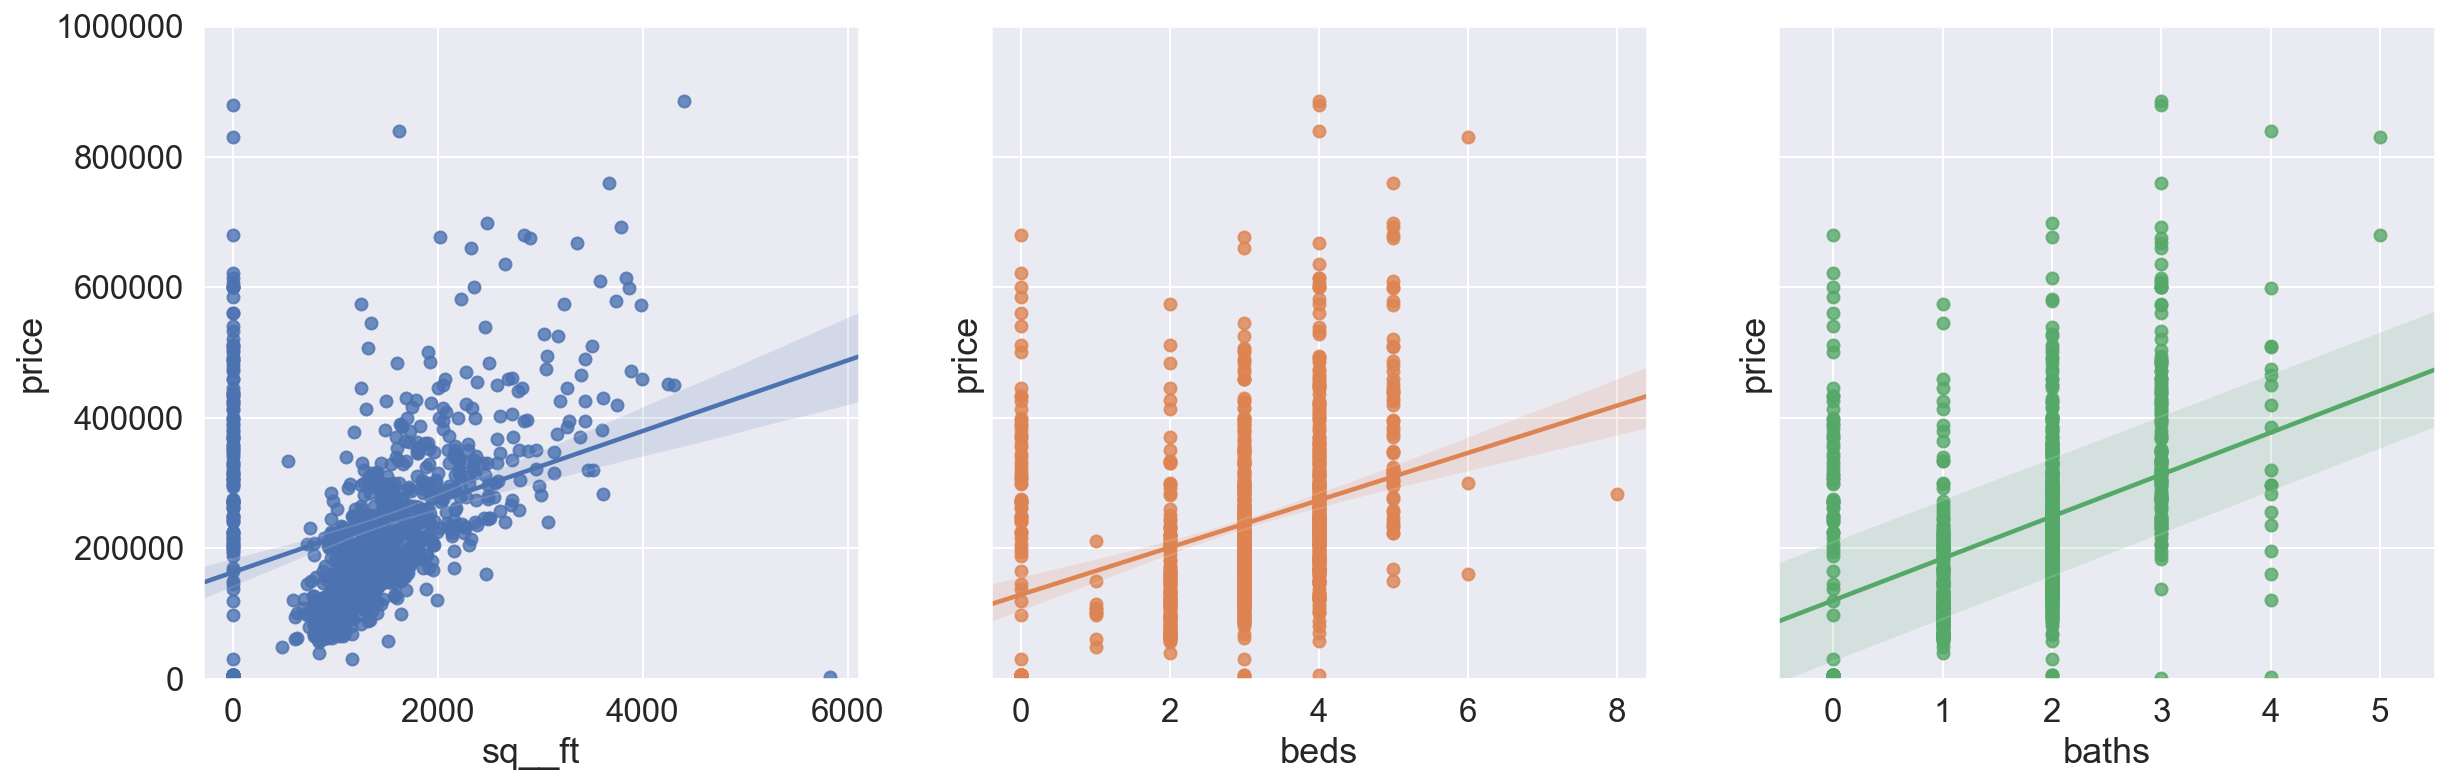

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 6), sharey=True)
sns.regplot(x='sq__ft', y='price', data=shd, ax=ax[0])
sns.regplot(x='beds', y='price', data=shd, ax=ax[1])
sns.regplot(x='baths', y='price', data=shd, ax=ax[2])
ax[2].set_xlim([-0.5, 5.5])
ax[2].set_ylim([0, 10**6])
plt.show()

When you're  all done cleaning or made a good deal a progress cleaning, it is never a bad idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [15]:
# It looks like Square Footage is a better predictor than Beds or Baths.
# Beds and Baths are discrete measures as opposed to Square feet, which is continuous.
# Additionally, there is probably some strong correlation between them in that houses
# with bigger square feet will have more beds and more baths.

# If we dropped all the spots of land that are in the dataset (those with 0 sq ft,
# beds & baths)  we would see a much stronger trend line in our plot.

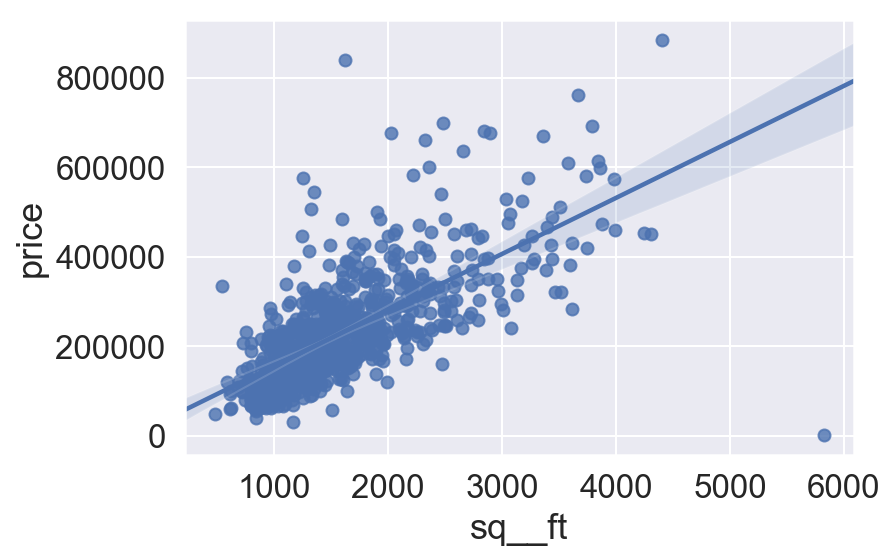

In [16]:
sns.regplot(x='sq__ft', y='price', data=shd[shd.sq__ft != 0])
plt.show()

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [17]:
import numpy as np
import scipy.stats

# Get the optimal slope and intercept

def sls_fit_pd(df, X, Y):
    '''Takes a dataframe and the column names 
    refering to predictor and target variable,
    returns the regression coefficients beta_0 and beta_1.'''
    y_bar = df[Y].mean()
    x_bar = df[X].mean()
    std_y = df[Y].std()
    std_x = df[X].std()
    r_xy = df.corr().loc[X, Y]
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1

In [18]:
sls_fit_pd(shd, 'sq__ft', 'price')

(162930.1614069976, 54.15863968853088)

In [19]:
# Creating a copy of data excluding properties without size information
shd_clean = shd[shd.sq__ft > 0].copy()

In [20]:
beta_0, beta_1 = sls_fit_pd(shd_clean, 'sq__ft', 'price')
beta_0, beta_1

(30210.633866919117, 125.21648667984451)

### 6. Interpret the intercept. Interpret the slope.

In [21]:
# The intercept is the price obtained for zero square feet (which does not really make sense,
# but might still give a better model for higher prices).
# The slope is the increase in our target (price) variable for a 1-unit increase
# in our predictor variable (sq__ft). So, for every sq__ft increase there is
# an associated increase of ~125 dollars.

### 7: [Bonus] Using the model you came up with in Problem 5, do the following.

- Plot a histogram of the residuals and judge the distribution.
- Plot price versus your predictor in a scatter plot combined with the regression line and vertical lines for the residuals.
- Plot the true values of price versus the predicted values.

In [22]:
shd_clean['pred'] = beta_0 + beta_1*shd_clean.sq__ft
shd_clean['residuals'] = shd_clean.price - shd_clean.pred

In [23]:
shd_clean.residuals.sum().round(5)

-0.0

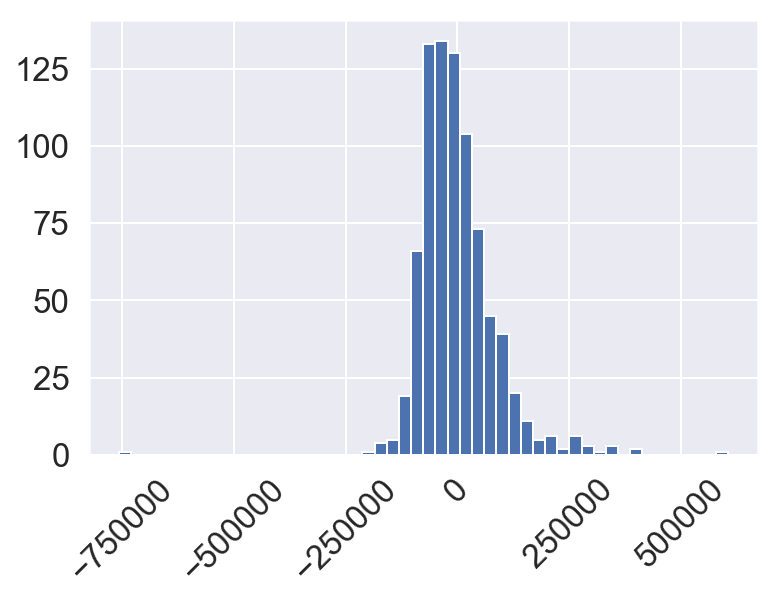

In [24]:
# Plot residuals
plt.hist(shd_clean.residuals, bins=50)
plt.xticks(rotation=45)
plt.show()

In [25]:
from statsmodels.graphics.gofplots import qqplot

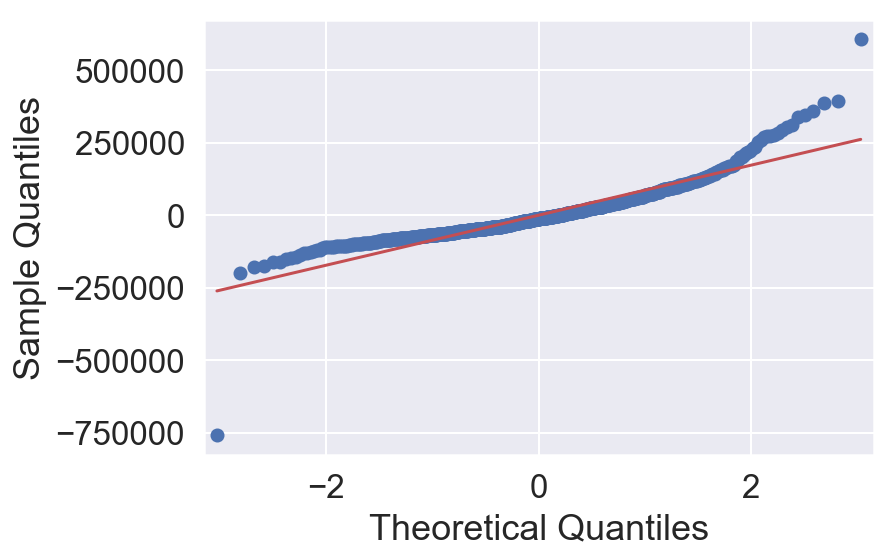

In [26]:
# This is a quantile-quantile plot to check if the residuals follow a normal distribution
qqplot(shd_clean.residuals, line='s')
plt.show()

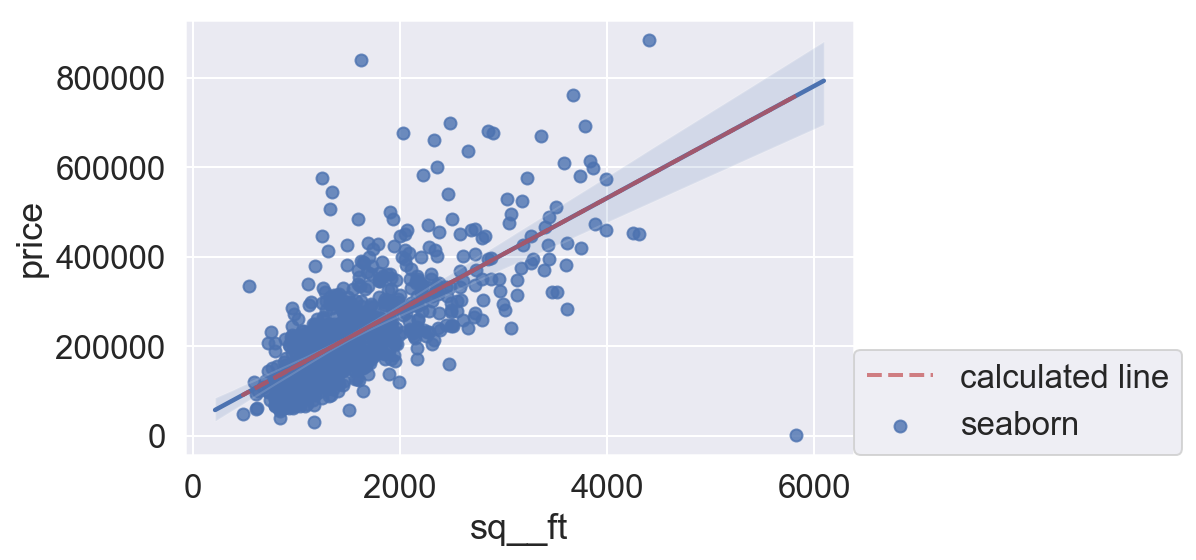

In [27]:
sns.regplot(x="sq__ft", y="price", data=shd_clean, label='seaborn')
plt.plot(shd_clean['sq__ft'],shd_clean['pred'], 'r--', alpha=0.7, lw=2, label='calculated line')
plt.legend(loc=[1, 0])
plt.show()

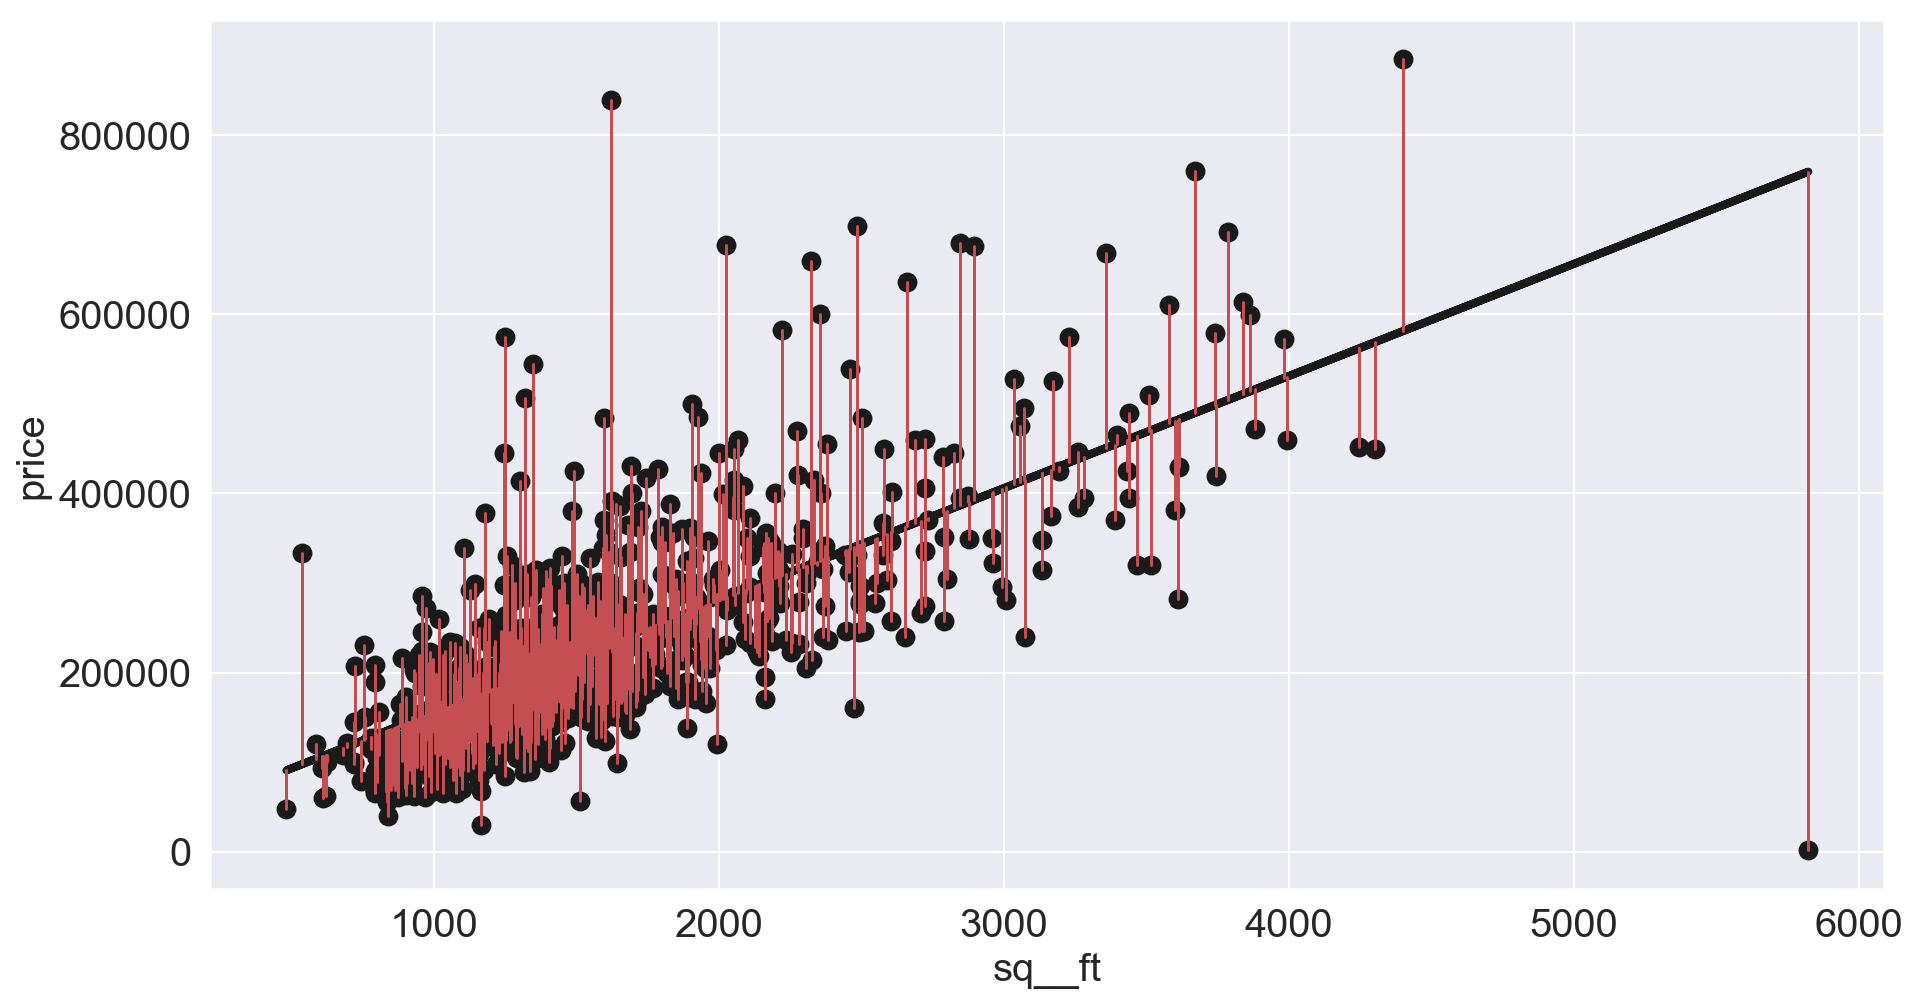

In [28]:
# Create a figure
fig = plt.figure(figsize=(15, 8))

# Get the axis
ax = fig.gca()

# This creates scatter plot
ax.scatter(x=shd_clean['sq__ft'], y=shd_clean['price'], c='k', s=80)
ax.plot(shd_clean['sq__ft'], shd_clean['pred'], color='k', lw=4)
ax.set_xlabel('sq__ft', fontsize=20)
ax.set_ylabel('price', fontsize=20)

# This creates vertical lines
ax.plot([shd_clean['sq__ft'], shd_clean['sq__ft']],
        [shd_clean['price'], shd_clean['pred']], c='r')
ax.tick_params(axis='both', labelsize=20)
plt.show()

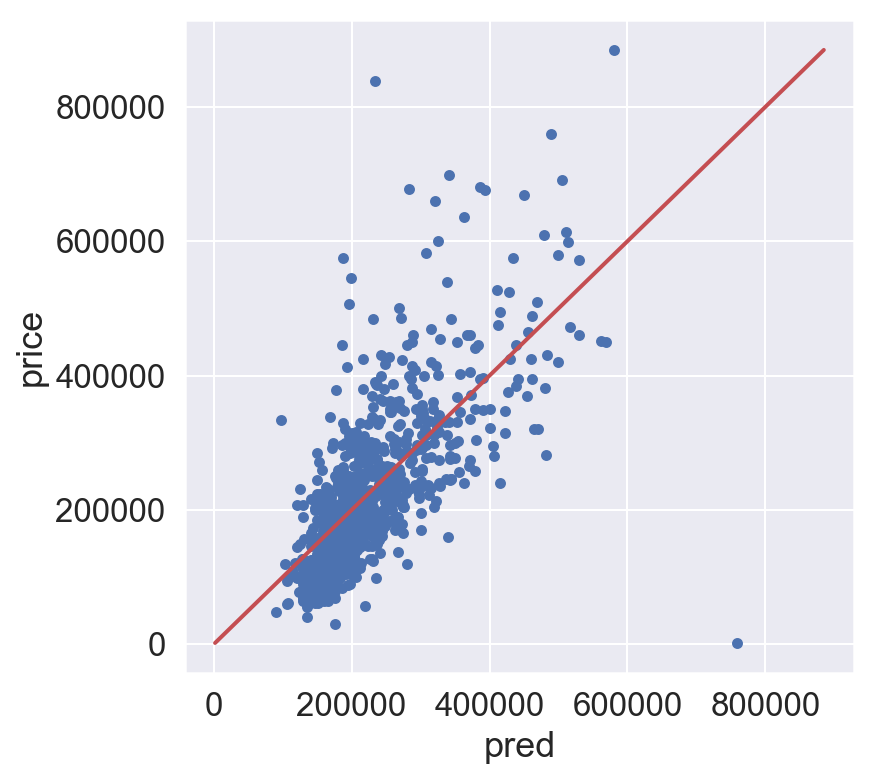

In [29]:
# Compare the actual Y vs predicted Y

fig, ax = plt.subplots(figsize=(6, 6))

# This creates scatter plot of predictions
shd_clean.plot(x='pred', y='price', kind='scatter', color='b', ax=ax)

# This creates a 45 degree line across actual Y
ax.plot([shd_clean.price.min(), shd_clean.price.max()], [
        shd_clean.price.min(), shd_clean.price.max()], lw=2, c='r')

plt.show()

# If predictions were to match actual Y exactly, all observations should fall on the 45 degree line.




In [30]:
# MSE
shd_clean.residuals.map(lambda x: x**2).mean()

7439426337.103193

In [31]:
# Root mean squared error
shd_clean.residuals.map(lambda x: x**2).mean()**0.5

86252.10917480913